# Unsupervised Learning

This notebook uses the DPA dataset with unsupervised learning.  Since Hamming Distance is the number of bits that are high in a byte, the power usage will be most different between HW=0 and HW=7 and so those classes should be the easiest to separate even with unsupervised learning.

We will first use the labels that we already have from before to see how the unsupervised algorithm should be separating the blobs into categories.  And then we'll use the KNN algorithm to check performance.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Workshop Functions
import sys
sys.path.append('..')
from WKDSS320_functions import * 

With Hamming Weight, the bigger the difference between the class numbers, the bigger the separation between classes.  for example, the separation between classes 1 and 2 is less than the separation between classes 1 and 7.  This is because the system uses more power to record a byte value with a HW=7 than it does for a byte with HW=1.  The power difference between HW=2 and 3 is small becuase HW3 represents just one additional bit going high and that is an lightly incrementally larger amount of power.

**Curiosity Points** (5 Points) - try different values for class1 and class2 and see the effect on the scatter plot further below.  Note that the extreme classes (0 and 7) have fewer observations.  

In [2]:
class1 = 2
class2 = 6

In [3]:
X = pd.read_csv("DPA_Data_Small.csv")
y = pd.read_csv("DPA_target.csv", index_col=0)
y = np.array(y).ravel()
type(y)

pd.Series(y).value_counts()

4    274
5    210
3    209
6    123
2    101
1     39
7     38
0      6
dtype: int64

In [4]:
X_2class = X.loc[(y==class1) | (y==class2),:]
X_2class.shape
y_2class = y[(y==class1) | (y==class2)]
y_2class.shape

(224,)

In [5]:
y_2class

array([6, 6, 2, 6, 6, 2, 2, 2, 6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6,
       6, 6, 2, 6, 2, 6, 2, 6, 2, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 6, 6, 6,
       2, 2, 2, 2, 6, 6, 2, 2, 6, 2, 6, 6, 2, 6, 6, 2, 2, 2, 6, 6, 2, 2,
       6, 2, 2, 2, 2, 6, 2, 6, 2, 2, 6, 6, 6, 6, 2, 6, 6, 6, 2, 2, 2, 2,
       6, 6, 6, 2, 6, 6, 2, 2, 6, 6, 2, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 2, 2, 2, 6, 2, 2, 6, 2, 6, 6, 2, 2, 6, 6, 6, 6, 2, 6, 6, 2, 2,
       2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 2, 2, 2, 6, 6, 2,
       2, 2, 6, 6, 2, 6, 2, 2, 2, 2, 6, 6, 2, 2, 2, 6, 6, 2, 2, 2, 6, 2,
       6, 6, 2, 6, 2, 2, 2, 6, 2, 6, 6, 2, 2, 2, 6, 6, 2, 2, 6, 2, 6, 6,
       2, 2, 2, 2, 6, 2, 6, 6, 2, 2, 6, 6, 2, 2, 6, 6, 6, 6, 2, 6, 6, 6,
       2, 6, 6, 6], dtype=int64)

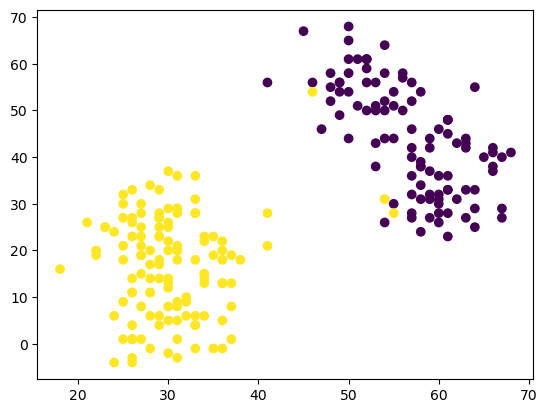

In [6]:
plt.scatter(X_2class.iloc[:,2],X_2class.iloc[:,3],c=y_2class)
plt.show()

#### KNN
Let's build the KNN classifier and try it out

In [7]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2, random_state=1)
clf.fit(X_2class.iloc[:,[2,3]])
y_pred = clf.labels_

In [8]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1])

In [9]:
y_2class

array([6, 6, 2, 6, 6, 2, 2, 2, 6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6,
       6, 6, 2, 6, 2, 6, 2, 6, 2, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 6, 6, 6,
       2, 2, 2, 2, 6, 6, 2, 2, 6, 2, 6, 6, 2, 6, 6, 2, 2, 2, 6, 6, 2, 2,
       6, 2, 2, 2, 2, 6, 2, 6, 2, 2, 6, 6, 6, 6, 2, 6, 6, 6, 2, 2, 2, 2,
       6, 6, 6, 2, 6, 6, 2, 2, 6, 6, 2, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 2, 2, 2, 6, 2, 2, 6, 2, 6, 6, 2, 2, 6, 6, 6, 6, 2, 6, 6, 2, 2,
       2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 2, 2, 2, 6, 6, 2,
       2, 2, 6, 6, 2, 6, 2, 2, 2, 2, 6, 6, 2, 2, 2, 6, 6, 2, 2, 2, 6, 2,
       6, 6, 2, 6, 2, 2, 2, 6, 2, 6, 6, 2, 2, 2, 6, 6, 2, 2, 6, 2, 6, 6,
       2, 2, 2, 2, 6, 2, 6, 6, 2, 2, 6, 6, 2, 2, 6, 6, 6, 6, 2, 6, 6, 6,
       2, 6, 6, 6], dtype=int64)

In [10]:
y_pred[y_pred==1] = 6
y_pred[y_pred==0] = 2
y_pred

array([6, 6, 2, 6, 6, 2, 2, 2, 6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6,
       6, 6, 2, 6, 2, 6, 2, 6, 2, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 6, 6, 6,
       2, 2, 2, 2, 6, 6, 2, 2, 6, 2, 6, 6, 2, 6, 6, 2, 2, 2, 6, 6, 2, 2,
       6, 2, 2, 2, 2, 6, 2, 6, 2, 2, 6, 6, 6, 6, 2, 6, 6, 6, 2, 2, 2, 2,
       6, 6, 6, 2, 6, 6, 2, 2, 6, 6, 2, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 2, 2, 2, 6, 2, 2, 6, 2, 6, 6, 2, 2, 6, 6, 6, 6, 2, 6, 6, 2, 2,
       2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 2, 2, 6, 6, 6, 2, 2, 2, 6, 6, 2,
       2, 2, 6, 6, 2, 6, 2, 2, 2, 2, 6, 6, 2, 2, 2, 6, 6, 2, 2, 2, 6, 2,
       6, 6, 2, 6, 2, 2, 2, 6, 2, 6, 6, 2, 2, 2, 6, 6, 2, 2, 6, 2, 6, 6,
       2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 6, 6, 2, 2, 6, 6, 6, 6, 2, 6, 6, 6,
       2, 6, 2, 6])

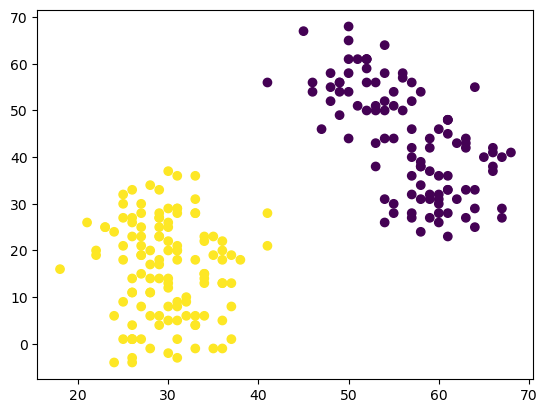

In [11]:
plt.scatter(X_2class.iloc[:,2],X_2class.iloc[:,3],c=y_pred)
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_2class, y_pred))

              precision    recall  f1-score   support

           2       0.97      1.00      0.99       101
           6       1.00      0.98      0.99       123

    accuracy                           0.99       224
   macro avg       0.99      0.99      0.99       224
weighted avg       0.99      0.99      0.99       224



### Finding the KNN Elbow
Next let's try using a new dataset to find the best K value to choose by finding the elbow in the accuracy

We're going to take a look at the Iris dataset, which is known to have 3 classes.  We will treat it as an unlabeled dataset, knowing that the correct number of groups that KNN should pick is 3.  

In [13]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
print(X.shape, y.shape)

(150, 4) (150,)


In [14]:
type(X)

numpy.ndarray

In [15]:
# Choose which dimensions you want to use
var1=2
var2=3

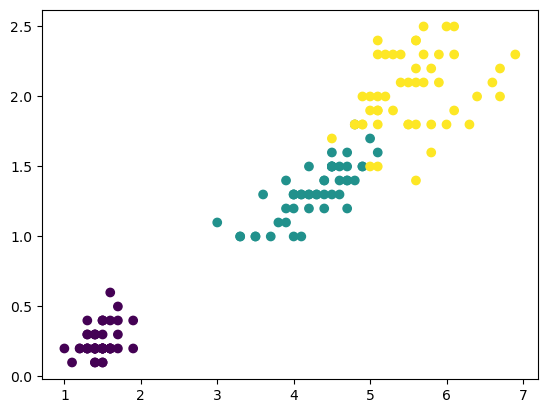

In [16]:
plt.scatter(X[:,var1],X[:,var2],c=y)
plt.show()

This function is included in our class library file, and was created by Mr. Ajitesh Kumar and can be found at this link: https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python/

It takes in a dataframe and the columns you want to use, and returns the Sum of Square Errors plot for various values of K.  

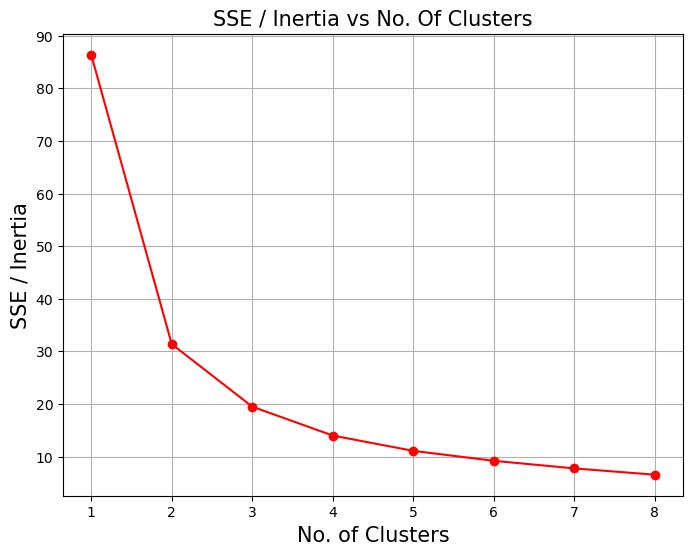

In [17]:
ax = drawSSEPlotForKMeans(pd.DataFrame(X), [var1,var2])
plt.savefig('KMeans_SSE.png',bbox_inches ="tight")

**Curiosity Points** (5 points): The SSE plot varies based on which variables you provide.  Try different variables var1 and var2 and see the effect on the SSE and how many clusters KNN identifies at the SSE elbow.  

Now have we've selected the number of clusters we want K to be 3, let's use KMeans to cluster these 

SSE is  31.371358974358976


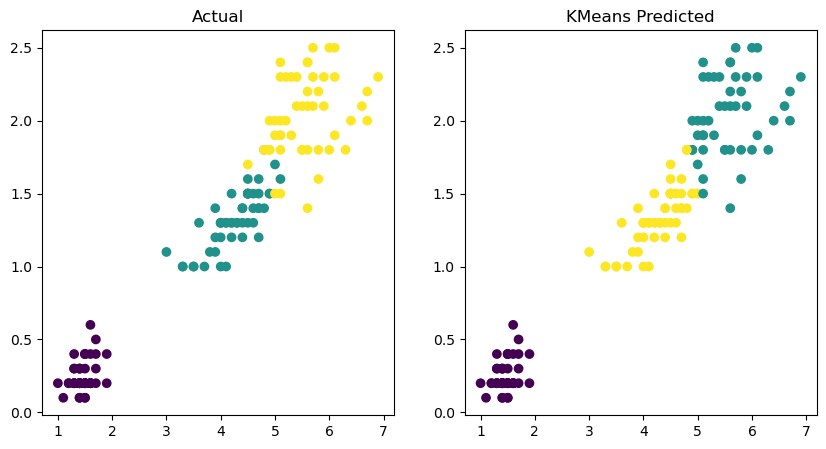

In [18]:
from sklearn.cluster import KMeans
inertia_values = []

df = pd.DataFrame(X)

km = KMeans(n_clusters=3, random_state=0)
km.fit_predict(df.iloc[:, [var1,var2]])
print('SSE is ', km.inertia_)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10, 5))
ax[0].scatter(X[:,var1],X[:,var2],c=y)
ax[0].set_title('Actual')
ax[1].scatter(x=df.iloc[:,var1], y=df.iloc[:,var2], c=km.labels_)
ax[1].set_title('KMeans Predicted')
plt.show()